# Example 5a: Using the Area of Review (AoR) Workflow in an NRAP-Open-IAM Control File Simulation.

This example demonstrates how to use the AoR plot type in the Control File Interface. Specifically, this example examines the setup of the .yaml file for Control File Example 55b (ControlFile_ex55b.yaml) as well as the example's output. The figures and .csv files produced show the extent of pressure and CO$_2$ saturation plumes within reservoir resulting from the injection operation as well as the aquifer impact that could occur if hypothetical open wellbores (i.e., uncemented) were distributed across the domain. By examing the pressure, saturation, and different aquifer impact metric plumes that could arise if open leakage pathways were present (a worst-case scenario offering a conservatively high portrayal of leakage risks), one can use the results to inform the extent of the site's AoR.

The present control file example creates a map-view figure showing where reservoir pressures exceed the local critical pressure (i.e., the pressure required to drive brine leakage into the aquifer considered given the parameters and stratigraphy used). Another figure shows the TDS plume volumes that could occur in the aquifer if leakage pathways were present. The AoR Workflow also creates an overall AoR reflecting different metrics (pressure and CO$_2$ saturation in the reservoir as well as pH and TDS plume volumes in the aquifer considered, aquifer 4).

Note that before this example can be run, one need to have the OpenIAMEnv environment activated (environment containing the python libraries required to run NRAP-Open-IAM - see the installation .txt files in the 'installers' folder). For example, one can open Anaconda Prompt, use the command "conda activate OpenIAMEnv" to activate the environment, navigate to the directory for NRAP-Open-IAM, and then use the command "jupyter notebook" to open Jupyter Notebook from that directory and within that environment. Then, the jupyter notebook examples will have access to the Python libraries within NRAP-Open-IAM environment.

First, we review the different sections of the .yaml control file. Control files will typically use the pound symbol followed by hyphens (#---) to mark separate sections, but these characters are not required. Any symbols following a pound symbol (#) will be ignored by the Python script that reads the .yaml file, so the pound symbols and hyphens are only there to provide some comments or divide the control file into logical parts. 

Every control file must have a section called 'ModelParams'. In this section, one specifies the model times to assess ('EndTime: 20' and 'TimeStep: 1.0', times are in years), the type of analysis to conduct (i.e., deterministic or stochastic, controlled by the 'Analysis' entry), the names of the components included in the system model ('Components'), and the output directory to save the output ('OutputDirectory').

Each entry is followed by a colon (:), with the input following the colon. Here, the analysis type is forward, or a so called deterministic simulation (i.e., results will be the same each time the simulation is run). The list of components is actually empty ('Components: [ ]'); this approach is not typical for a control file, and only works when using a Workflow that can automatically handle such matters. We discuss such considerations further below.

Next, the control file specifies the stratigraphy of the model domain under the 'LookupTableStratigraphy' section. This example portrays spatially variable stratigraphy by using a LookupTableStratigraphy component. The file used ('stratigraphy.csv') contains information regarding how the thicknesses vary over the model domain. There are five shale layers in the domain ('numberOfShaleLayers: 5' under 'Parameters').

The only other section the control file contains is the Workflow section. In the control file interface, a Workflow can automate the setup of components and plots. In contrast, in a normal control file one must manually set up the sections for each component and plot. Workflow automation was created to minimize the effort required to run specific analyses. The delineation of AoRs is likely to be a common usage of NRAP-Open-IAM, so this analysis should be as convenient as possible. Additionally, this automation can prevent the occurence of common errors. For example, in a common control file the user must type component names in multiple locations (e.g., in the 'Components' list in the 'ModelParams' section, in the component's own section, and in the sections for any connected components). A typo or a slight formatting error could cause the simulation to fail.

The Workflow type is specified through the entry 'Type: AoR', which is indented under 'Workflow'. All other information for the simulation is entered under the 'Options' entry.

We show the entire Workflow section here, but further below we focus on specific entries in the 'Options' section.

Most of the entries indented under 'Options' control the types and parameterizations of the components used ('ReservoirComponentType', 'ReservoirOptions', 'WellboreComponentType', 'WellboreOptions', 'AquiferComponentType', and 'AquiferOptions').

The options 'AutomateResCompSetup', 'AutomateWellCompSetup', and 'AutomateAqCompSetup' dictate whether the Workflow should handle the creation of the component entries for the reservoir, wellbore, and aquifer components, respectively. In the AoR Workflow, the default setting for these options is 'True'.

The 'TimeList' entry specifies the times (in years) that will be examined in AoR analyses. If 'TimeList' is not given, the default approach is to focus on the maximum reservoir and aquifer impacts across all model times (i.e., the highest pressures and largest plume volumes that ever occurred in the simulation). When evaluating specific model times, each figure will show the maximum values for the corresponding model time.

The entry 'FigureName' specifies the name of the figure showing an overall AoR (i.e., one based on multiple metrics). Here, the name 'Overall_AoR_Plot.tiff' specifies that the figure will be saved as a .tiff file. If no extension is included in the name, the default extension type is .png.

The entry 'PlotInjectionSites' specifies whether the map-view AoR figures should show the position of the injection site. The x and y coordinates of the injection site (easting and northing distances, in meters) are given through the 'InjectionCoordx' and 'InjectionCoordy' entries.

The 'CriticalPressureMPa' entry controls the handling of critical pressure in the map-view figure showing reservoir pressures. CriticalPressureMPa can be given as a specific pressure in MPa or as 'Calculated'. When 'Calculated' is entered, the critical pressure is calculated based on the stratigraphy and parameter values of the wellbore component.

Here, a LookupTableReservoir component is used to portray reservoir conditions over time ('ReservoirComponentType: LookupTableReservoir'). This component reads reservoir pressures and CO$_2$ saturations from .csv files included in the FutureGen 2.0 data set (https://edx.netl.doe.gov/dataset/futuregen-2-0-1008-simulation-reservoir-lookup-table). Before this example can be run, the .zip file available on that web page must be downloaded. Then, the contents of the .zip file must be extracted and placed in the folder 'source/components/reservoir/lookuptables/FutureGen2/1008_sims' (where the 'source' folder is in the top folder of the NRAP-Open-IAM directory).

The details of the .csv files containing the output of reservoir simulations are presented through the entries 'FileDirectory', 'TimeFile', 'ParameterFilename', and 'Parameters: index: 1'. All of these are indented under 'ReservoirOptions'. All of the .csv files used are in the directory entered for 'FileDirectory'. The index provided ('index: 1') specifies which row to use in the file entered under 'ParameterFilename' (different rows in that file contain names of the files with data corresponding to a particular reservoir simulation). The .csv file provided for the 'TimeFile' entry contains the time points used in the reservoir simulations.

The entry 'Interpolation2D: False' specifies that the interpolation of pressures and CO$_2$ saturations should be performed in a three-dimensional manner (not two-dimensional). In other words, the exact depth of each wellbore and its position within the reservoir will be considered. This approach is in contrast with an approach when only the pressures at the top of the reservoir are estimated, regardless of the wellbore's exact depth.

The entry 'WellboreComponentType: OpenWellbore' specifies that an OpenWellbore component will be used. This type is the only wellbore component type that works with the AoR Workflow. While it is unlikely that unknown legacy wells near the site will be completely uncemented, this approach is intended to examine how significant the aquifer impacts could be in a worst-case scenario where open wellbores are distributed across the domain.

The x and y coordinates for the hypothetical wellbores are specified through the 'Locations' entry. Here, the hypothetical wellbores are arranged in a grid ('Locations: grid: ...'). The x and y values used in the grid are specified in lists ('x: [207222.852, 217720.8147, 228689.9084, 238815.372, 250862.3802]' and 'y: [4380572.494, 4391070.415, 4402039.405, 4412165.014, 4424212.081, 4439642.734]'; values are in meters). These coordinates were taken from the .csv files containing the reservoir simulation data.

Certain parameter values for the OpenWellbore component are specified under 'Parameters'. Such parameters include the well radius ('wellRadius: 0.05', in meters), the transmissivity values of the reservoir and aquifer ('logReservoirTransmissivity' and 'logAquiferTransmissivity', in log$_{10}$ m$^3$), and the salinity and density of the brine in the reservoir ('brineSalinity', dimensionless, and 'brineDensity', in kg m$^{-3}$).

The 'Controls' entry under 'WellboreOptions' contains two entries. The first, 'critPressureApproach', specifies whether to use a critical pressure in leakage rate calculations. The default setting is True, and this setting is used here. The second entry is 'enforceCritPressure'. This option is only used if a user wanta to use a specific critical pressure in leakage rate calculations. If 'enforceCritPressure' is set to False, the critical pressure will be calculated depending on the depths of the reservoir and aquifer as well as the brine density (see the OpenWellbore component description in the User Guide, section 3.9). If user sets 'enforceCritPressure' to True and also provide a value for 'critPressure' under 'Parameters', the 'critPressure' given will be used instead of a calculated critical pressure. Here, a calculated critical pressure is used.

The entry 'AquiferName: aquifer4' specifies that the wellbores will leak into aquifer 4. There are four aquifers and five shales overlying the storage reservoir. Shale 1 is just above the reservoir and aquifer 1 is above the shale 1. Shale 2 is above aquifer 1. Therefore, aquifer 4 is the shallowest one and separated from the surface by shale 5.

The entry 'AquiferName: aquifer4' also specifies that the aquifer components will be made to represent aquifer 4. The entry 'AquiferComponentType: FutureGen2Aquifer' specifies that a FutureGen2Aquifer component will be used. Under the 'AquiferOptions' entry, several parameter values are specified. Such parameters include the porosity ('por') and permeability ('log_permh'). The parameter entry 'depth: aquifer4Depth' specifies that the FutureGen2Aquifer component's depth parameter will be set by the depth of aquifer 4.

When running the AoR Workflow, one does not have to specify the outputs of each component. All of the outputs required for AoR analyses will be included automatically.

When the control file is run, the AoR Workflow will produce five map-view figures. Four of these figures show the maximum reservoir pressures, CO$_2$ saturations, pH plume volumes, and TDS plume volumes across the domain. Each point shown is a hypothetical wellbore location, and the plume volumes shown are those that could occur if an uncemented wellbore was located there. The fifth figure shows an overall AoR that reflects all four of the metrics considered.

All results will also be saved in .csv files. Running an NRAP-Open-IAM control file depends on the type of computer used and how it was installed; for more information, see section 1.3 of the User Guide ('Installing NRAP-Open-IAM'). A control file is normally run through a command prompt (e.g., Anaconda Prompt on Anaconda Navigator). Below, we run the control file through a script-based approach.

Note that this simulation will take some time to run (e.g., about one minute). The outputs will be saved to a folder named 'output_ex55b_jupyter' in the 'output' folder in the NRAP-Open-IAM directory. The control file interface will print messages regarding the status of the simulation (e.g., 'Running file' or 'Analysis completed'). Once the simulation has finished and the plots are being made, the saved figure files can be found in the 'output_ex55b_jupyter' folder. When the AoR Workflow has finished, the code below will print the statement 'Finished'.

Note that the version of control file example 55b used in this notebook ('ControlFile_ex55b_jupyter.yaml') is similar to the one in the folder 'Control_files' ('ControlFile_ex55b.yaml'). The output directory has been changed to make accessing the output more convenient (i.e., the folder name will not contain the time stamp, i.e., the exact time at which it was created) and the number of points analyzed was reduced to speed up model run times.

While running, the simulation will print warning statements if entry Logging in the ModelParams section is set to Debug or Warning. For example, it will print statements saying 'Scaling below minimum saturation of 0.01'; the minimum CO$_2$ saturation expected by the OpenWellbore component is 0.01, but many values in the .csv files are zero. It will also say that the wellTop parameter of certain OpenWellbore components is outside the allowed range (0 m to 500 m). The wellTop parameter represents the bottom depth of the aquifer receiving leakage (aquifer four), and the stratigraphy inputs used will cause aquifer 4 to have depths greater than 500 m in certain locations (here, up to 685 m). The wellTop values greater than 500 m will be capped at 500 m. Despite such issues, the purpose of this example is to quickly demonstrate the conceptual framework of the AoR Workflow.

In [4]:
import sys
import os

# Add the source folder to the path
sys.path.insert(0, os.sep.join(['..', '..', 'source']))

# Name of the control file
file_name = 'ControlFile_ex55b_jupyter.yaml'

file_path = os.path.join(os.getcwd(), '..', 'Control_Files', 
                         'examples_for_jupyter_notebook', file_name)

source_dir = os.path.join(os.getcwd(), '..', '..', 'source')

# Path to the file openiam_cf.py, which is used to run control files
run_file = os.path.join(source_dir, 'openiam', 'openiam_cf.py')

# Set up the command to run the control file
run_command = '"{0}" --file "{1}"'.format(
     run_file, file_path)

In [5]:
print('Running Control File example 55b...')

# Run the control file
%run -i $run_command

print('Finished.')

Running Control File example 55b...
Finished.


<Figure size 432x288 with 0 Axes>

Now, wait for the control file to finish running. Even after the main simulation is finished, the AoR analysis will continue to run for some time. When it is finished, the code above will print the statement 'Finished'.

After the AoR analysis has finished, run the code below. This code will load and display the five figures produced by control file example 55b. If you run this code before running the example, it will print a statement saying that the figure cannot be found.

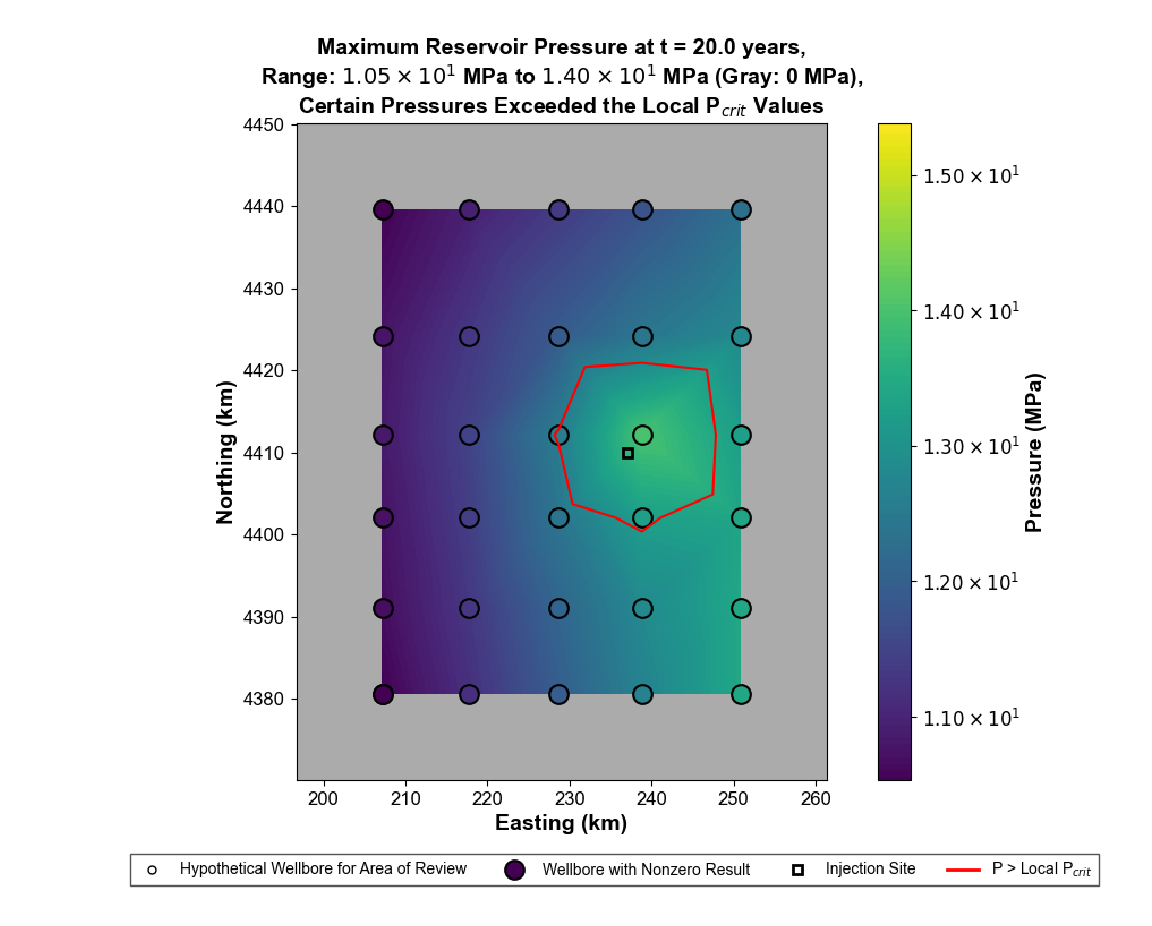

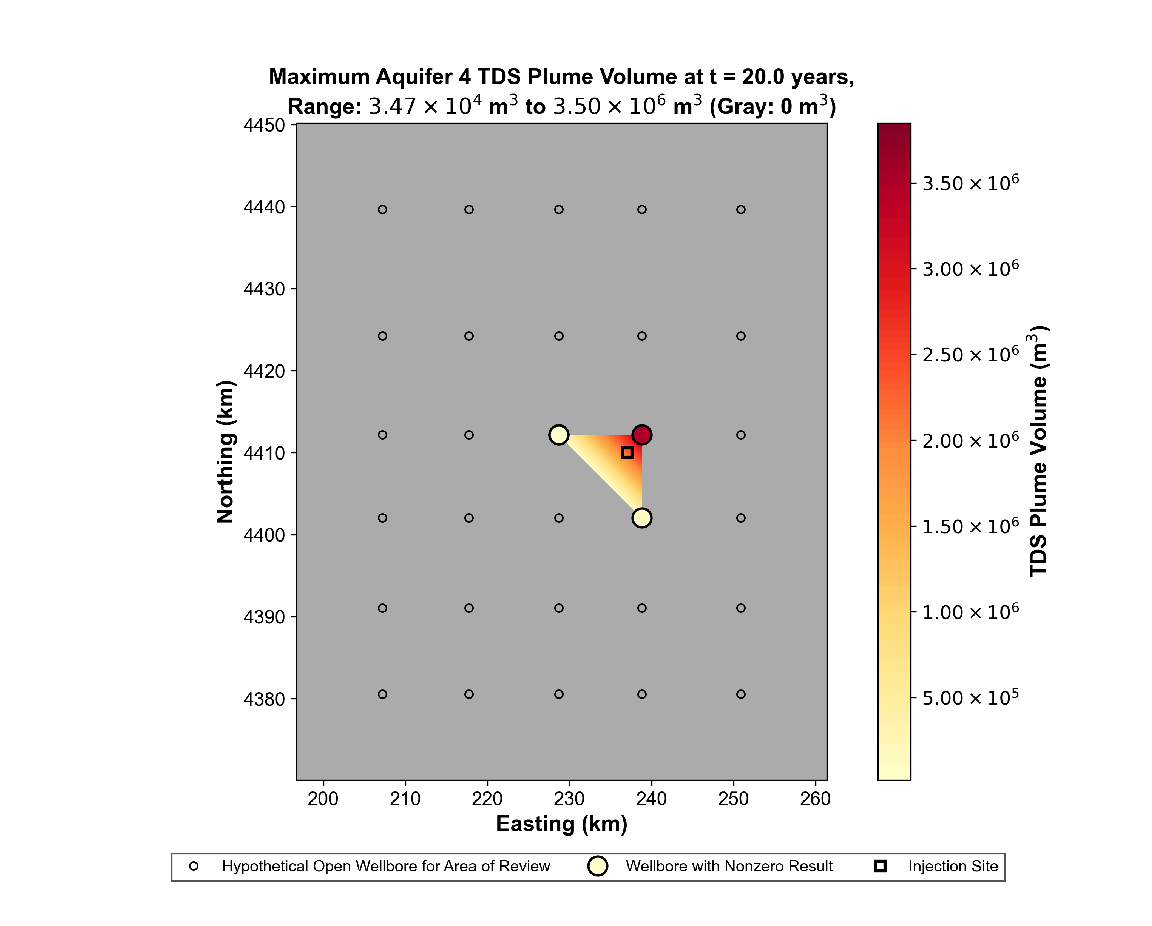

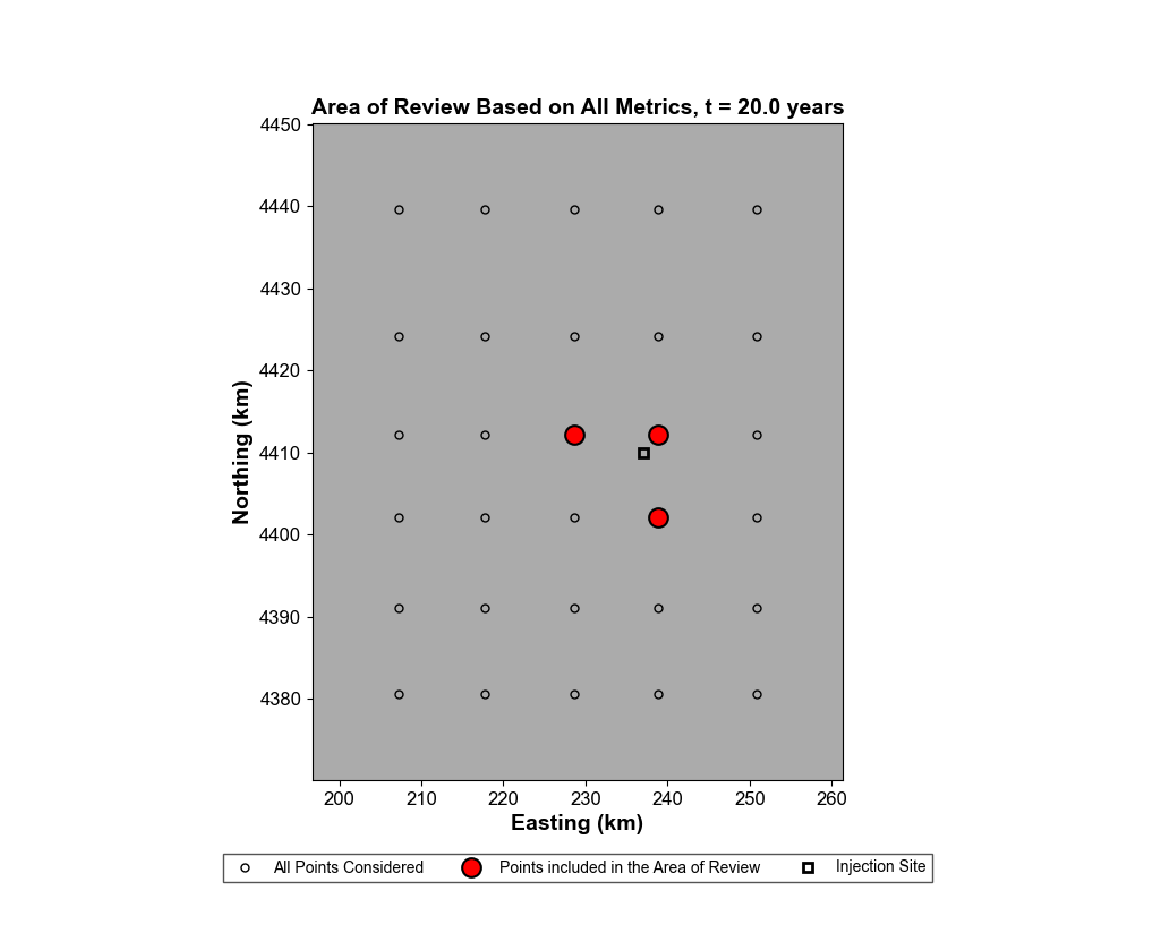

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

figure_names = ['Pressure_Plot_tIndex_1.png', 'Pressure_Plot_tIndex_5.png', 
                'Pressure_Plot_tIndex_10.png', 'Pressure_Plot_tIndex_20.png', 
                'Aq_Brine_Metric_Plot_tIndex_1.png', 'Aq_Brine_Metric_Plot_tIndex_10.png', 
                'Aq_Brine_Metric_Plot_tIndex_20.png', 
                'CO2_Saturation_Plot_tIndex_20.png', 'Aq_CO2_Impact_Plot_tIndex_20.png',
                'Overall_AoR_Plot_tIndex_1.tiff', 'Overall_AoR_Plot_tIndex_10.tiff', 
                'Overall_AoR_Plot_tIndex_15.tiff', 'Overall_AoR_Plot_tIndex_20.tiff']

# To plot all figures change False to True for variable plot_all below
plot_all = False
if plot_all:
    fig_indices = range(len(figure_names))
else:
    fig_indices = [3, 6, 12]

output_folder = os.path.join(os.getcwd(), '..', '..', 'output', 'output_ex55b_jupyter')

for figRef in fig_indices:
    file_path = os.path.join(output_folder, figure_names[figRef])
    
    check_for_figure = os.path.exists(file_path)
    
    if check_for_figure:
        img = mpimg.imread(file_path)
        
        fig = plt.figure(figRef + 1, figsize=(15, 12), dpi=100)
        ax = plt.gca()
        
        ax.imshow(img, interpolation='nearest')
        
        # We do not need the ticks from imshow, the figure file has its own ticks
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
        # We also do not need the spline added by imshow
        plt.setp(ax.spines.values(), alpha = 0)
    else:
        print('The figure {} was not found.'.format(file_path))

plt.show()